In [1]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,precision_recall_curve,auc,make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# get the data and save it in a dataframe.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.shape

(1000, 40)

In [4]:
# get the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# drop the '_c39' column as it has all null values.
# drop the 'policy_number' column as it is nominal data to identify the policy and insured person.
df.drop(columns=['_c39','policy_number'],inplace=True)

In [6]:
# check the number of missing values for each column.
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [7]:
# check for duplicates.
df.duplicated().value_counts()

# Not found any.

False    1000
dtype: int64

In [8]:
# Convert the 'policy_bind_date' column to datetime format and extract the Day, Month and Year into separate columns.
df['policy_bind_date']= pd.to_datetime(df['policy_bind_date'],format='%d-%m-%Y',dayfirst=True)
df['policy_bind_Day']= df['policy_bind_date'].dt.day
df['policy_bind_Month']= df['policy_bind_date'].dt.month
df['policy_bind_Year']= df['policy_bind_date'].dt.year
df.drop(columns=['policy_bind_date'],inplace=True)

In [9]:
# the 'incident_location' column has all unique values with respect to the location of the incident.
len(df['incident_location'].unique())

1000

In [10]:
# dropping it as it won't help us in model building.
df.drop(columns=['incident_location'],inplace=True)

In [11]:
# 'insured_zip' column has zip codes of the insured people.
len(df['insured_zip'].unique())

995

In [12]:
# dropping it.
df.drop(columns=['insured_zip'],inplace=True)

In [13]:
# Convert the 'incident_date' column to datetime format and extract the Day, Month and Year into separate columns.
df['incident_date']= pd.to_datetime(df['incident_date'],format='%d-%m-%Y',dayfirst=True)
df['incident_Day']= df['incident_date'].dt.day
df['incident_Month']= df['incident_date'].dt.month
df['incident_Year']= df['incident_date'].dt.year
df.drop(columns=['incident_date'],inplace=True)

In [14]:
# 'incident_Year' column has 2015 as entry in all rows.
df['incident_Year'].unique()

array([2015], dtype=int64)

In [15]:
# dropping it.
df.drop(columns=['incident_Year'],inplace=True)

In [16]:
# check the unique values in the 'property_damage' column.
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [17]:
# Considering the '?' value as missing value and encoding accordingly.
df['property_damage']=df['property_damage'].replace({'?':np.nan,'NO':0,'YES':1})
df['property_damage'].unique()

array([ 1., nan,  0.])

In [18]:
# check the unique values in the 'police_report_available' column.
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [19]:
# Considering the '?' value as missing value and encoding accordingly.
df['police_report_available']=df['police_report_available'].replace({'?':np.nan,'NO':0,'YES':1})
df['police_report_available'].unique()

array([ 1., nan,  0.])

In [20]:
# check the unique values in the 'collision_type' column.
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [21]:
# Considering the '?' value as a separate category replacing them with 'Other'.
df['collision_type']=df['collision_type'].replace('?','Other')
df['collision_type'].unique()

array(['Side Collision', 'Other', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [22]:
# check for duplicates.
df.duplicated().value_counts()

# Not found any.

False    1000
dtype: int64

# Let us see some plots of our dataset

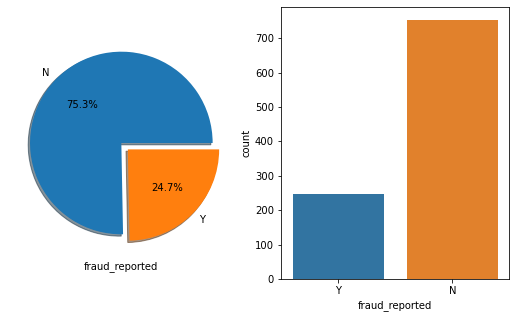

In [23]:
# Plot of target variable i.e. 'fraud_reported'.
f,ax=plt.subplots(1,2,figsize=(9,5))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
ax[0].set_xlabel('fraud_reported')
sns.countplot(df['fraud_reported'],ax=ax[1])
plt.show()

# The target column is moderately imbalanced.

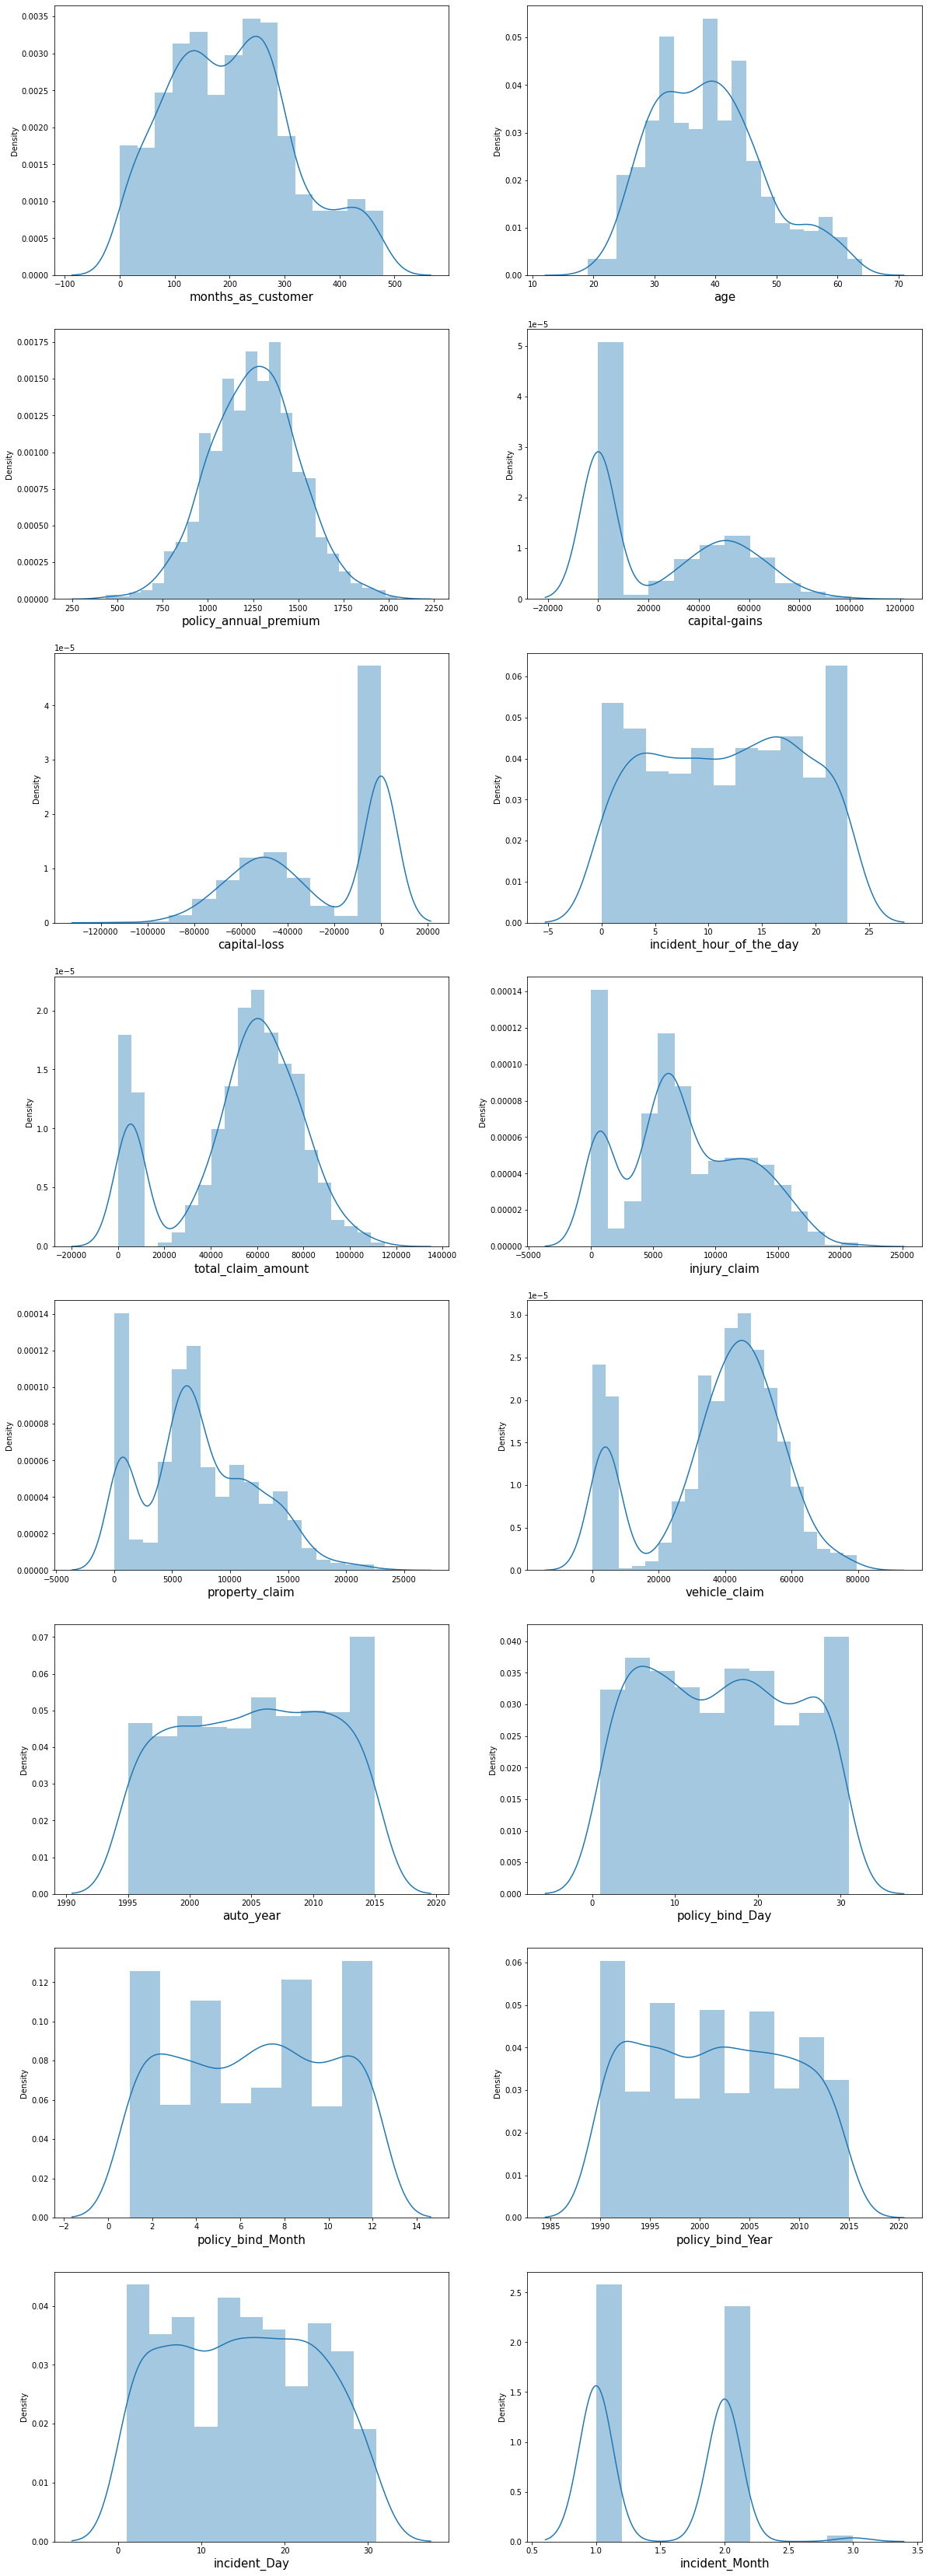

In [24]:
# Distribution plots of the features with continuous data.
df_cont=df[['months_as_customer', 'age','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day',
            'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim','auto_year','policy_bind_Day', 
            'policy_bind_Month','policy_bind_Year', 'incident_Day', 'incident_Month']]
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_cont:
    if plotnumber<=16:
        ax= plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

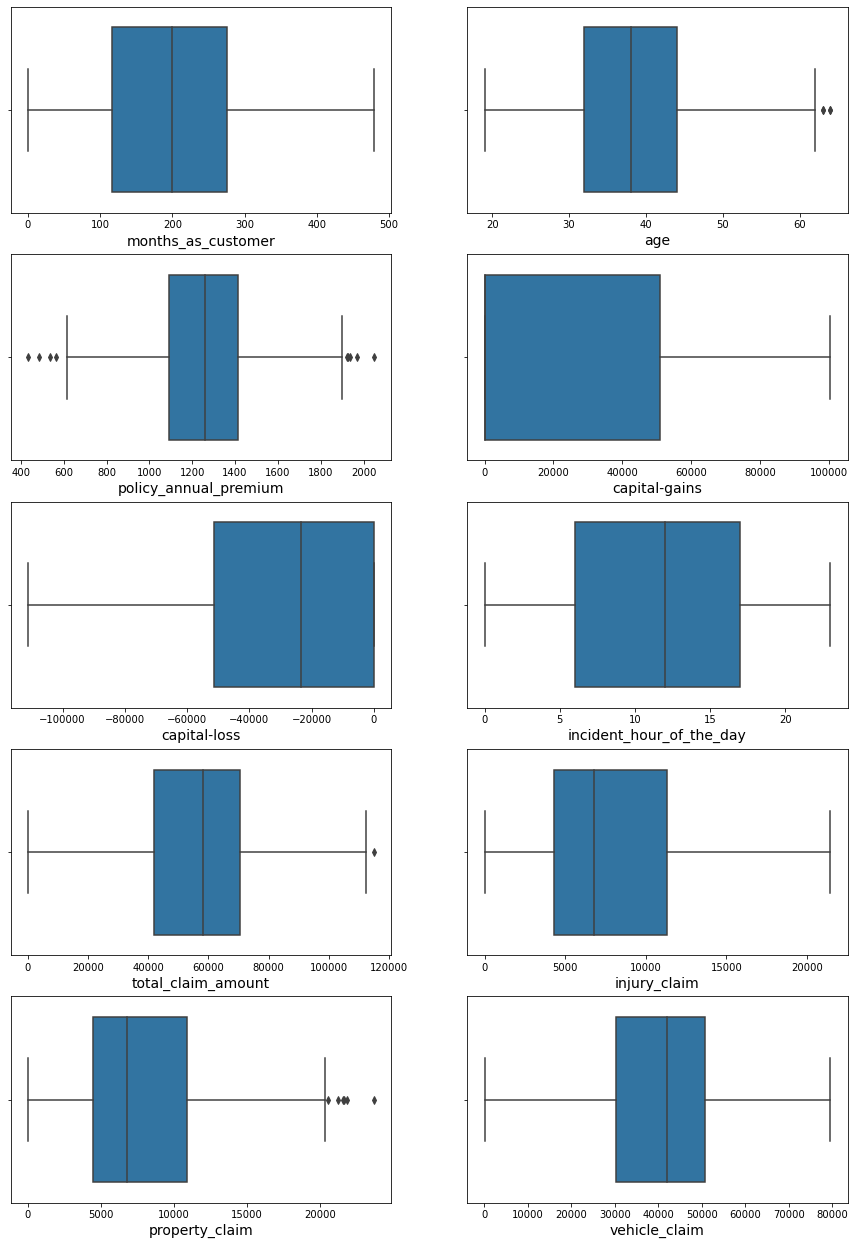

In [25]:
# Now let's see the box-plots of the above features.
plt.figure(figsize=(15,22))
plotnumber=1
for column in df_cont.iloc[:,:10]:
    if plotnumber<=10:
        ax= plt.subplot(5,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()

# There are few outliers in some columns.

In [26]:
# Removing outliers using z-score.
from scipy.stats import zscore
z_score= zscore(df[['age','policy_annual_premium','total_claim_amount','property_claim']])
abs_zscore= np.abs(z_score)
filtering_entry= (abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.shape

(996, 39)

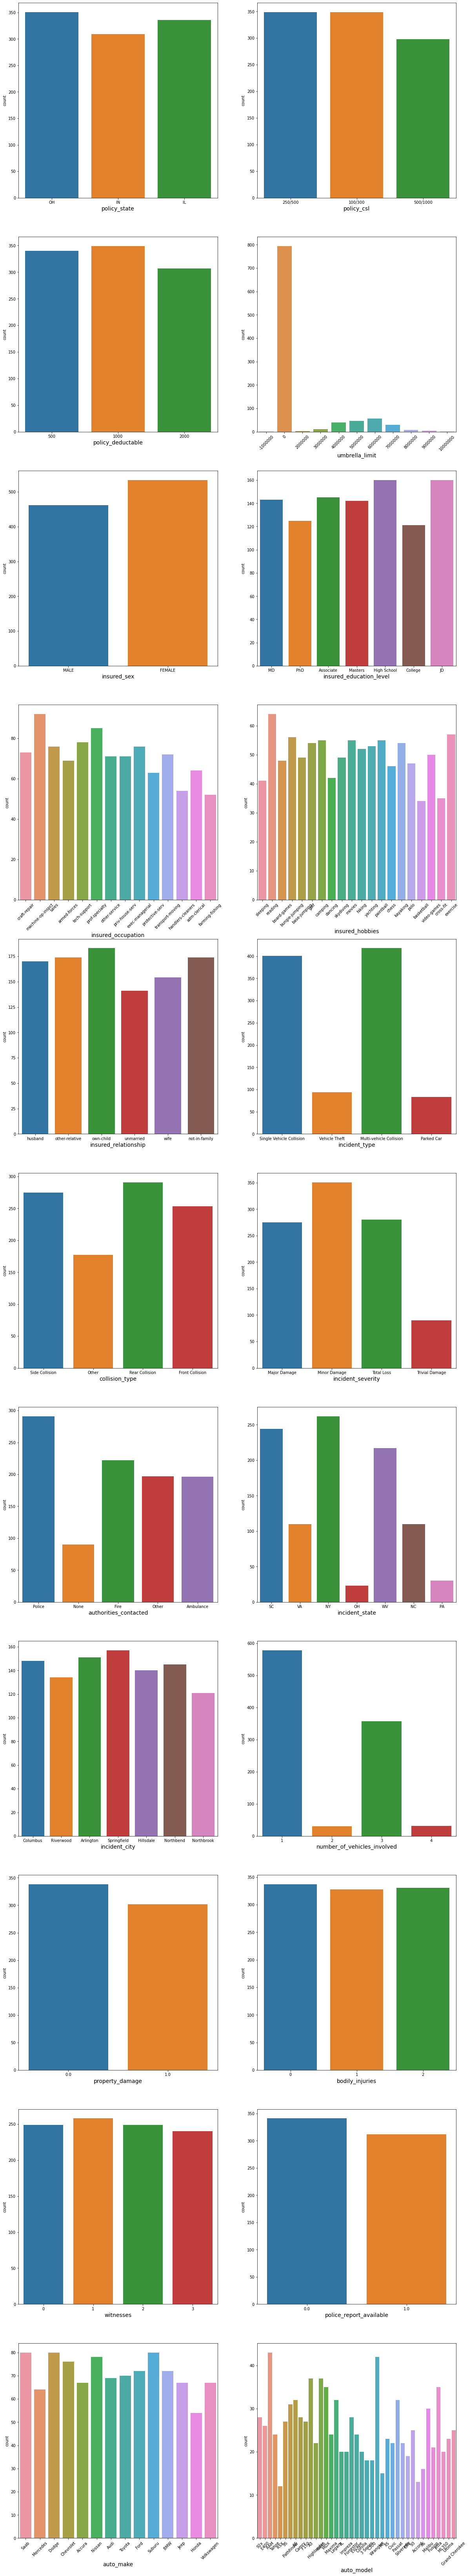

In [27]:
# Count-plots of the features with categorical data.
df_cat=df[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex', 'insured_education_level', 
           'insured_occupation','insured_hobbies', 'insured_relationship','incident_type','collision_type','incident_severity',
           'authorities_contacted', 'incident_state', 'incident_city','number_of_vehicles_involved','property_damage', 
           'bodily_injuries', 'witnesses','police_report_available','auto_make', 'auto_model','fraud_reported']]
plt.figure(figsize=(20,130))
plotnumber=1
for column in df_cat:
    if plotnumber<=22:
        ax= plt.subplot(12,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=14)
        if column in ['umbrella_limit','insured_occupation','insured_hobbies','auto_make','auto_model']:
            plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

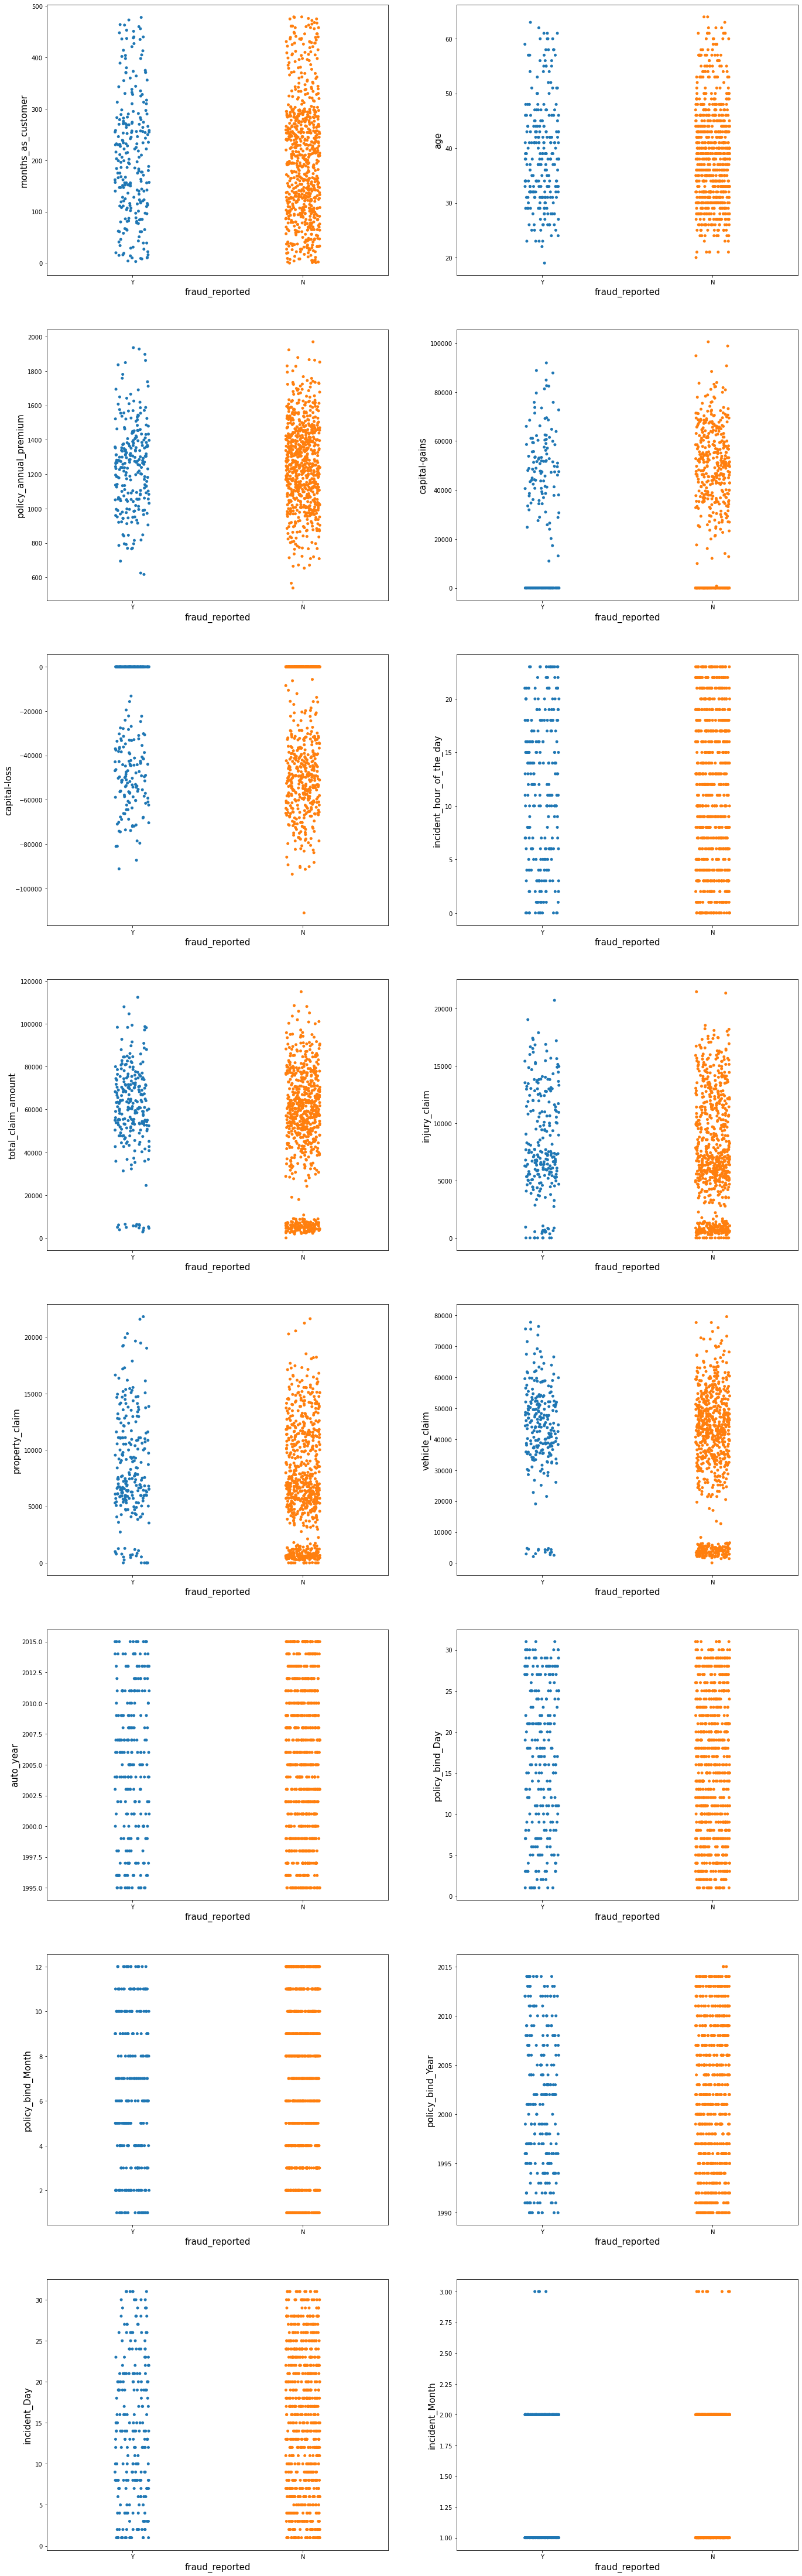

In [28]:
# Strip-plots of our continuous numeric features wrt the target variable i.e 'fraud_reported'
df_cont=df[['months_as_customer', 'age','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day',
            'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim','auto_year','policy_bind_Day', 
            'policy_bind_Month','policy_bind_Year', 'incident_Day', 'incident_Month']]
plt.figure(figsize=(23,80))
for i in enumerate(df_cont):
    plt.subplot(8,2,i[0]+1)
    sns.stripplot(x='fraud_reported',y=i[1],data=df)
    plt.xlabel('fraud_reported',fontsize=15)
    plt.ylabel(i[1],fontsize=15)

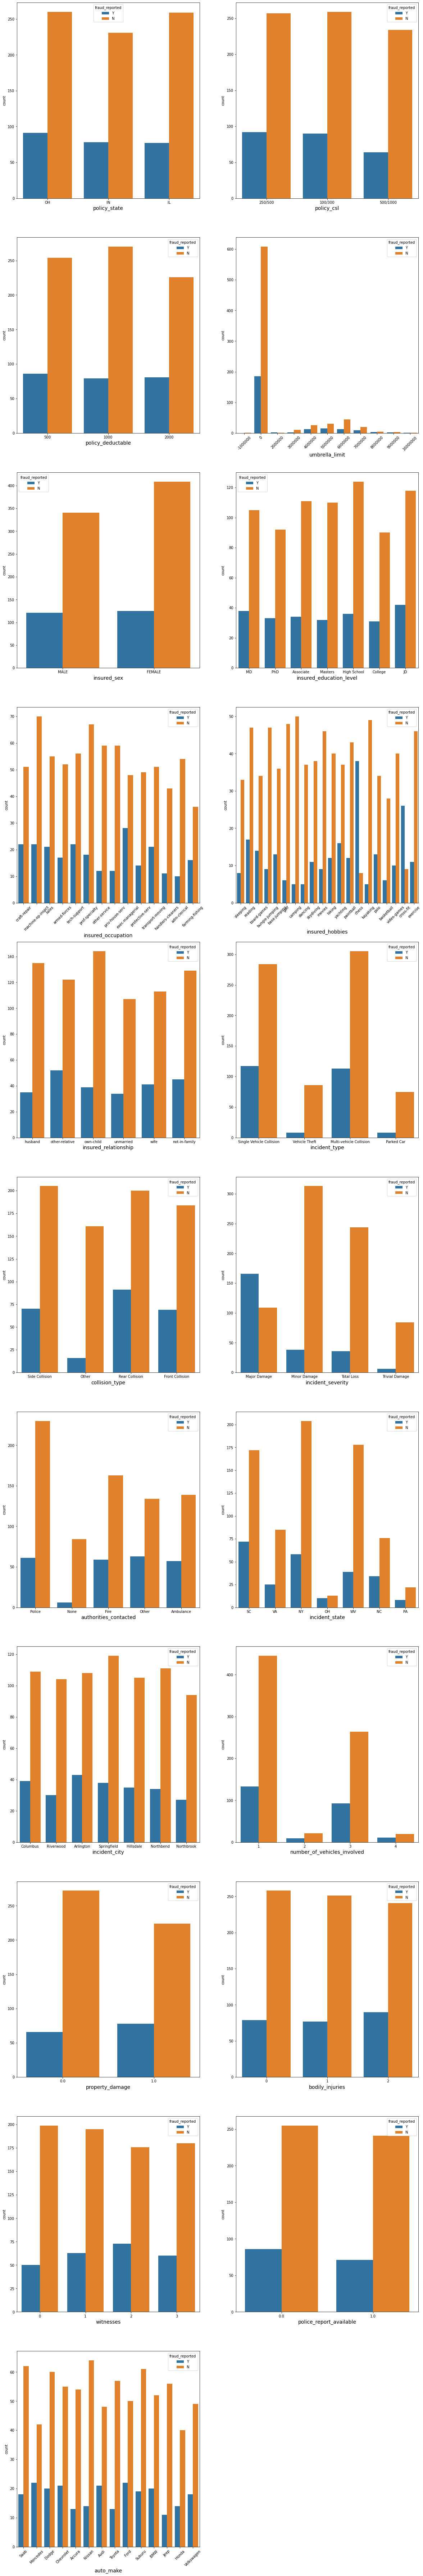

In [29]:
# Count-plots of our categorical features with respect to the target variable i.e 'fraud_reported'.
df_cat=df[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex', 'insured_education_level', 
           'insured_occupation','insured_hobbies', 'insured_relationship','incident_type','collision_type','incident_severity',
           'authorities_contacted', 'incident_state', 'incident_city','number_of_vehicles_involved','property_damage', 
           'bodily_injuries', 'witnesses','police_report_available','auto_make', 'auto_model']]
plt.figure(figsize=(20,130))
plotnumber=1
for column in df_cat:
    if plotnumber<=21:
        ax= plt.subplot(11,2,plotnumber)
        sns.countplot(df[column],hue=df['fraud_reported'])
        plt.xlabel(column,fontsize=14)
        if column in ['umbrella_limit','insured_occupation','insured_hobbies','auto_make','auto_model']:
            plt.xticks(rotation=45)
    plotnumber+=1
plt.show()

# Observations:
# 1. Fraud rate is higher in vehicle collision incident types.
# 2. Fraud rate is much higher in major damage incident severity cases.

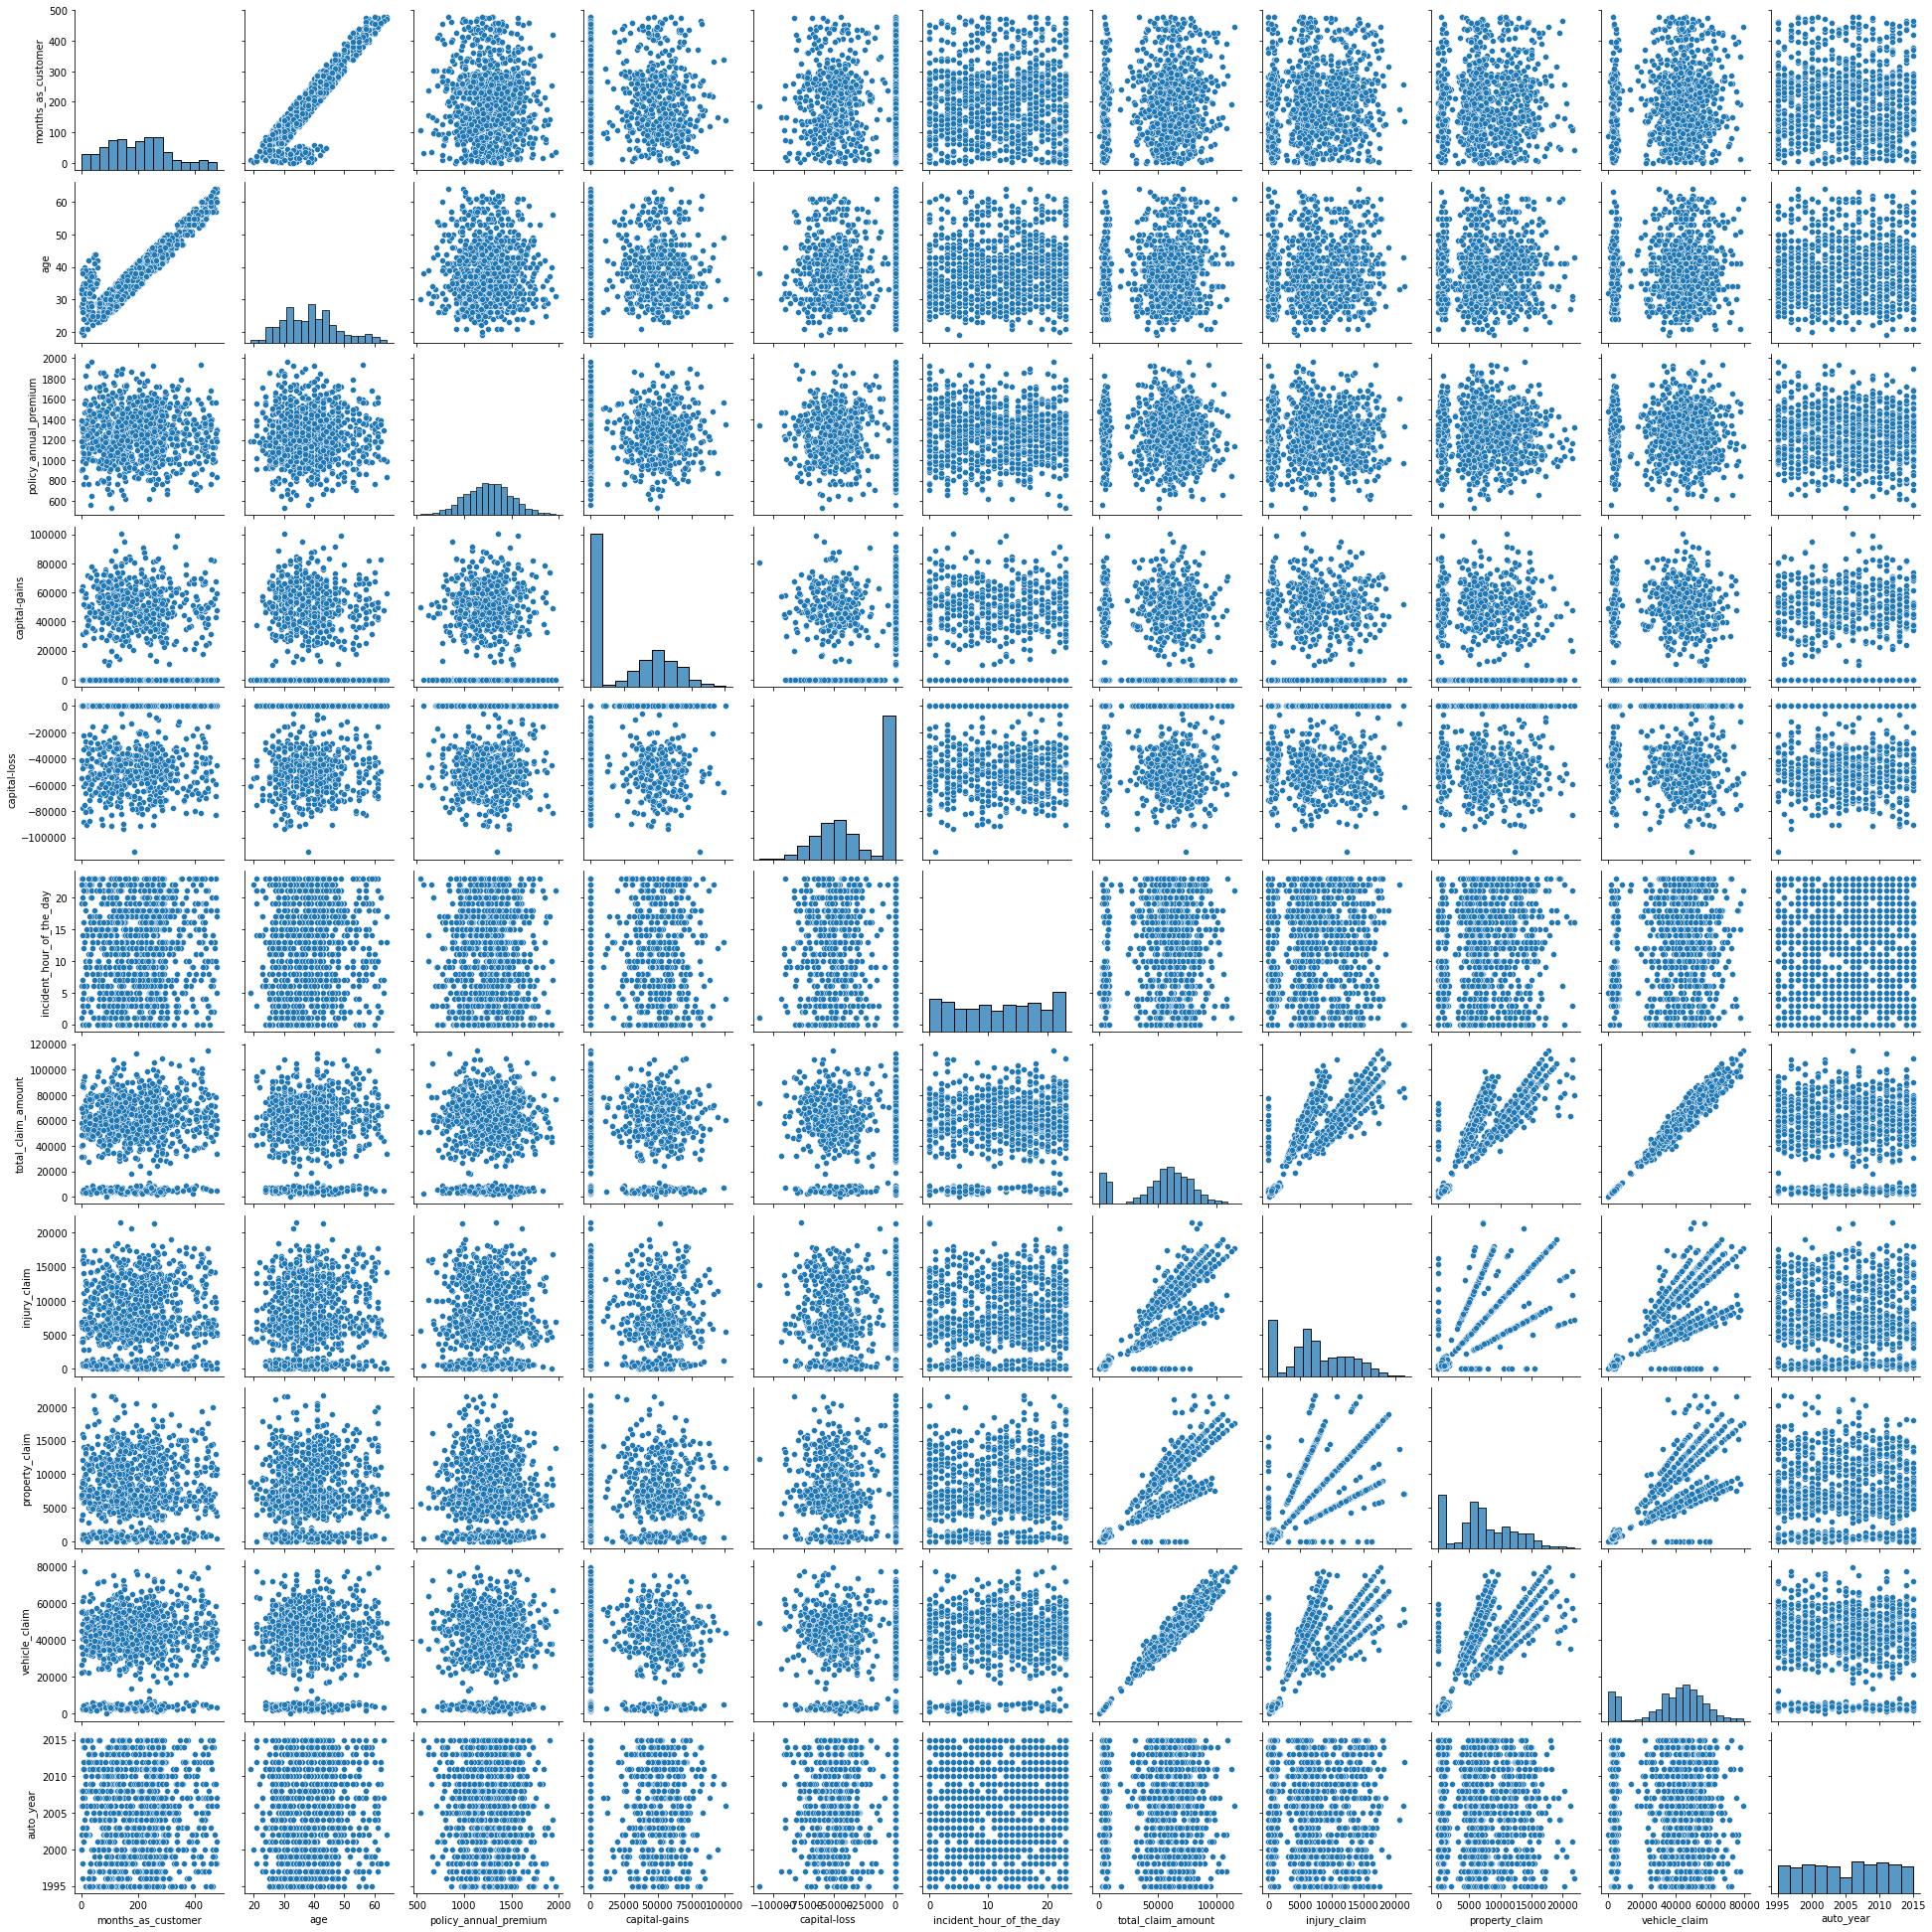

In [30]:
# Pairplots of the continuous numeric features.
df_cont=df[['months_as_customer', 'age','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day',
            'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim','auto_year']]
sns.pairplot(df_cont)

# Encoding the categorical columns

In [31]:
# Encoding the categorical object datatype columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])
    
features_enc=df[['policy_state', 'policy_csl','insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies', 
                 'insured_relationship','incident_type', 'collision_type','incident_severity', 'authorities_contacted', 
                 'incident_state','incident_city','auto_make','auto_model', 'fraud_reported']]
for i in features_enc:
    label_encode(i)
    
df.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  ...  vehicle_claim  auto_make  \
0                        4                   2  ...          52080         10   
1                        4                   6  ...           3510          8   
2                        6                  11  ...          23100          4   
3                        6                   1  ...          50720          3   
4                        0                  11  ...           4550          0   

   auto_model  auto_year  fraud_reported  policy_bind_Day  policy_bind_Month  \
0           1       2004               1               17                 10   
1          12       2007               1               27                  6   
2          30       2007               0                6                  9   
3          34       2014               1               25                  5   
4          31       2009               0                6                  6   

   policy_bind_Year  incident_Day  incident_Month  
0              2014            25               1  
1              2006            21               1  
2              2000            22               2  
3              1990            10               1  
4              2014            17               2  

[5 rows x 39 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           996 non-null    int64  
 1   age                          996 non-null    int64  
 2   policy_state                 996 non-null    int32  
 3   policy_csl                   996 non-null    int32  
 4   policy_deductable            996 non-null    int64  
 5   policy_annual_premium        996 non-null    float64
 6   umbrella_limit               996 non-null    int64  
 7   insured_sex                  996 non-null    int32  
 8   insured_education_level      996 non-null    int32  
 9   insured_occupation           996 non-null    int32  
 10  insured_hobbies              996 non-null    int32  
 11  insured_relationship         996 non-null    int32  
 12  capital-gains                996 non-null    int64  
 13  capital-loss        

In [33]:
# Using KNN Imputer to fillup the missing values.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=7)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           996 non-null    float64
 1   age                          996 non-null    float64
 2   policy_state                 996 non-null    float64
 3   policy_csl                   996 non-null    float64
 4   policy_deductable            996 non-null    float64
 5   policy_annual_premium        996 non-null    float64
 6   umbrella_limit               996 non-null    float64
 7   insured_sex                  996 non-null    float64
 8   insured_education_level      996 non-null    float64
 9   insured_occupation           996 non-null    float64
 10  insured_hobbies              996 non-null    float64
 11  insured_relationship         996 non-null    float64
 12  capital-gains                996 non-null    float64
 13  capital-loss        

# Correlation

<AxesSubplot:>

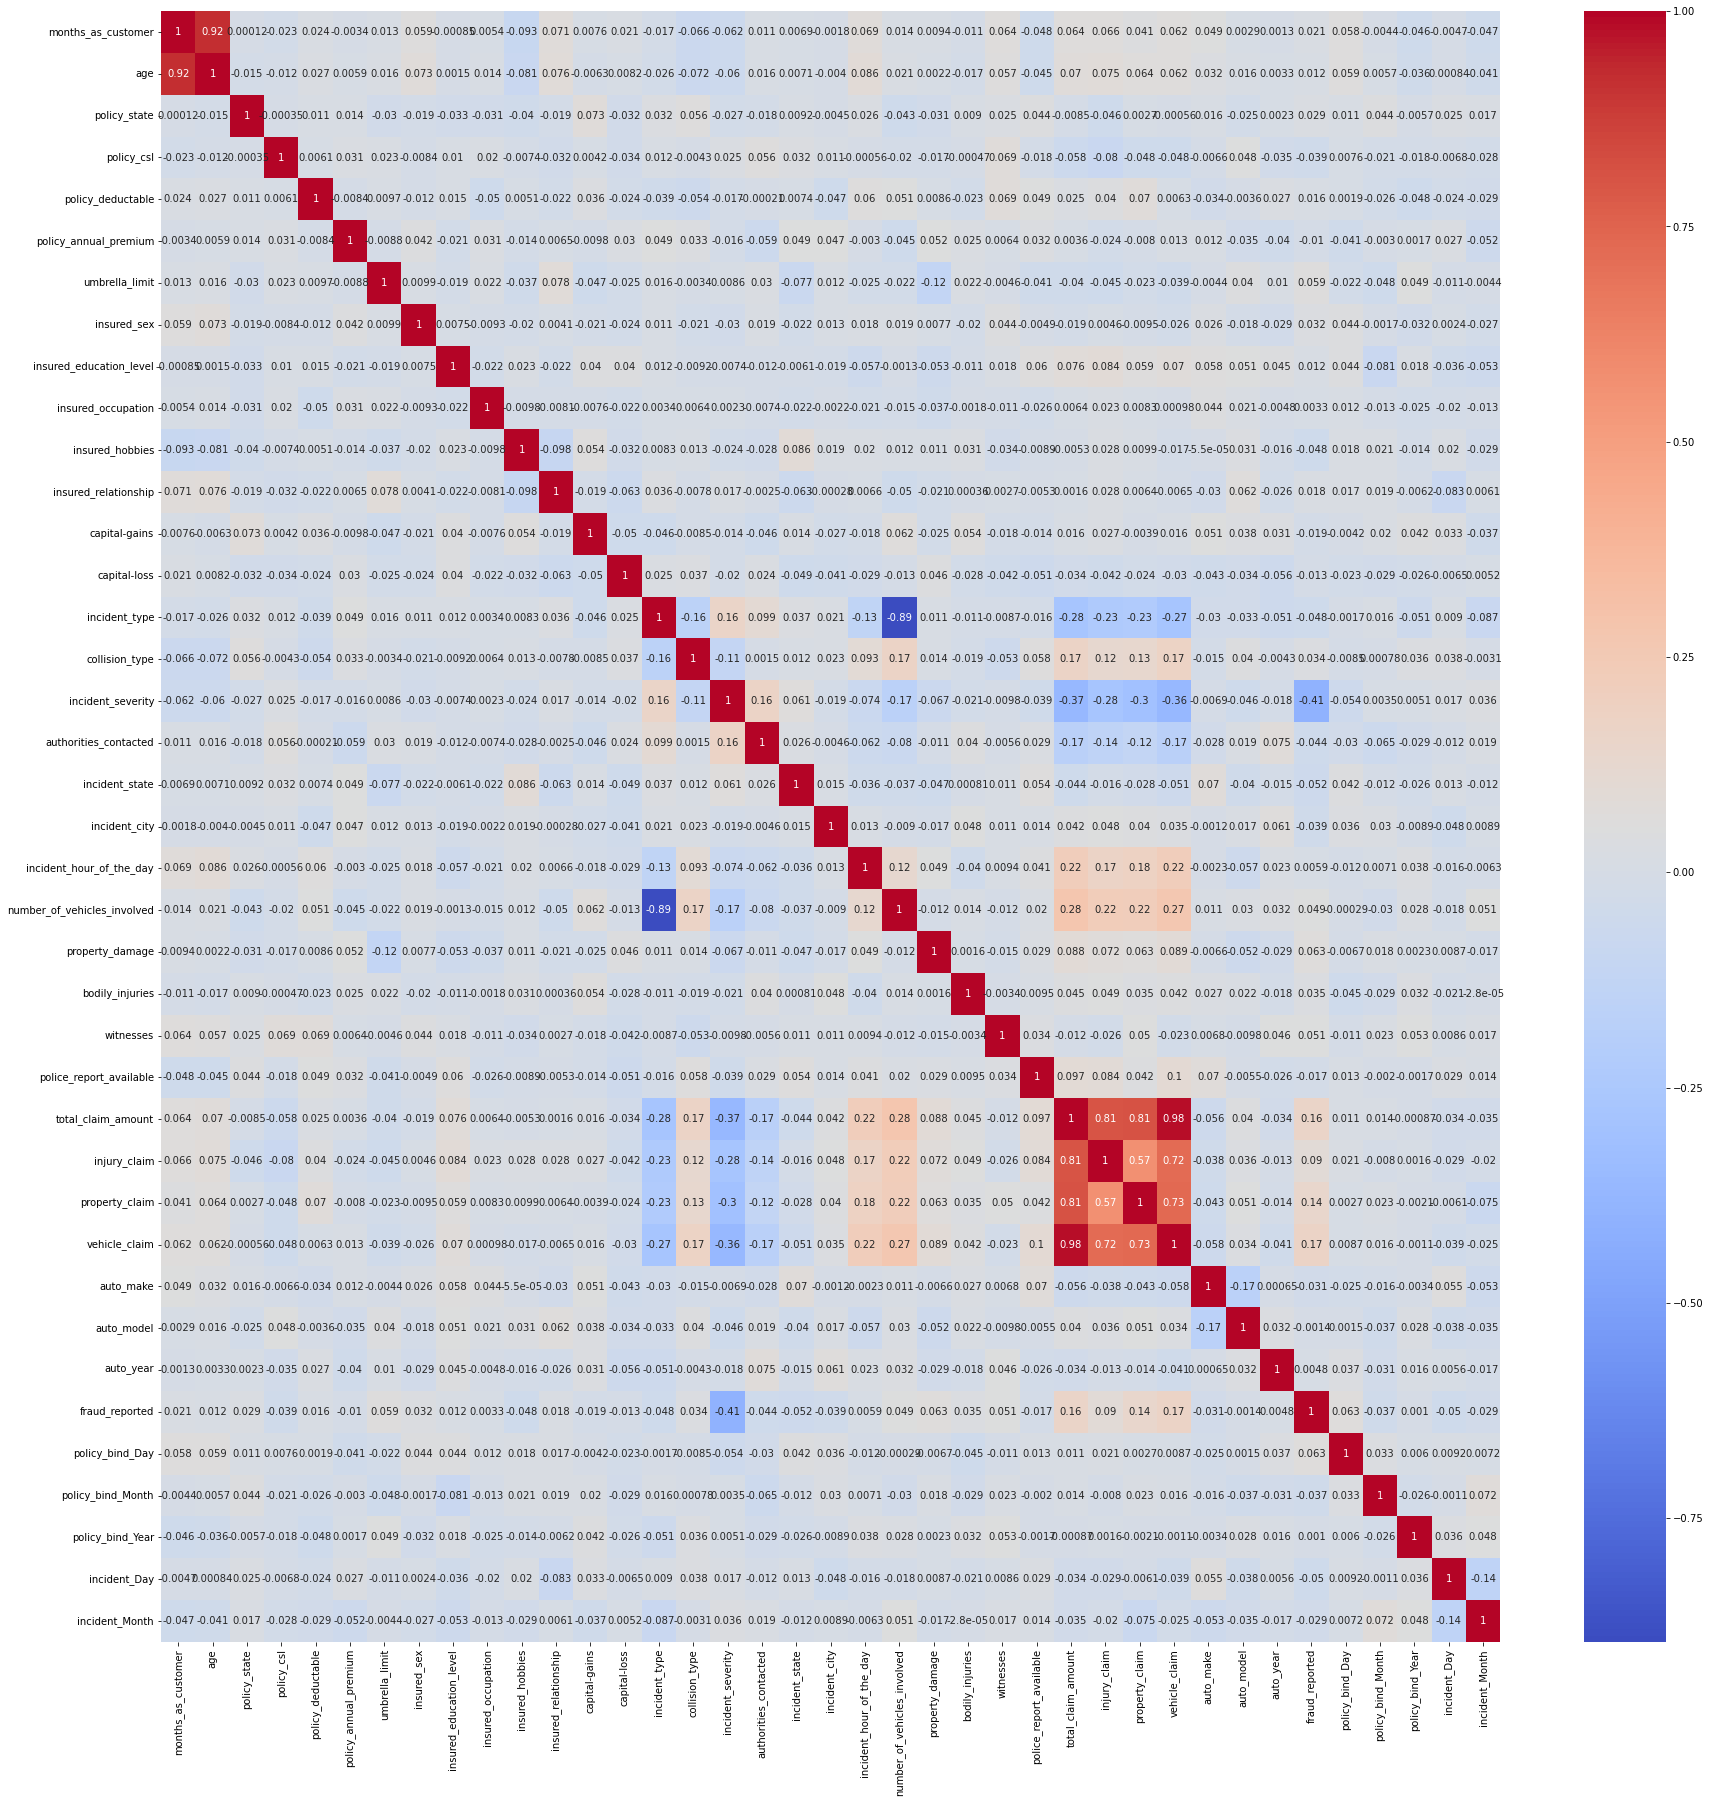

In [34]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# There might be a multicollinearity issue among columns showing various types of claim amount.
# 'incident_type' and 'number_of_vehicles_involved' might have a multicollinearity issue.

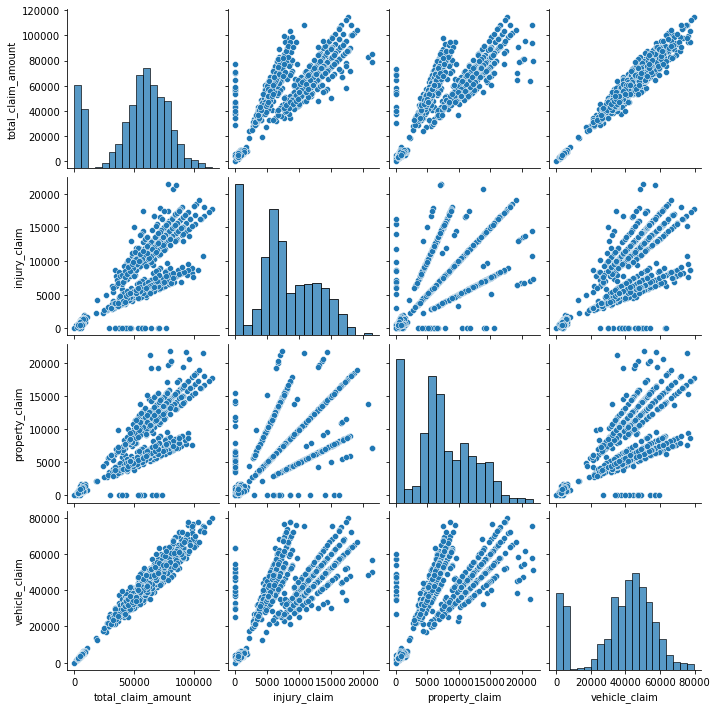

In [35]:
# Let's see the pairplots of columns showing various types of claim amount.
df_claim=df[['total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim']]
sns.pairplot(df_claim)

In [36]:
# We can see that the total_claim_amount is summation of the other three.
df_claim

total_claim_amount  injury_claim  property_claim  vehicle_claim
0               71610.0        6510.0         13020.0        52080.0
1                5070.0         780.0           780.0         3510.0
2               34650.0        7700.0          3850.0        23100.0
3               63400.0        6340.0          6340.0        50720.0
4                6500.0        1300.0           650.0         4550.0
..                  ...           ...             ...            ...
991             87200.0       17440.0          8720.0        61040.0
992            108480.0       18080.0         18080.0        72320.0
993             67500.0        7500.0          7500.0        52500.0
994             46980.0        5220.0          5220.0        36540.0
995              5060.0         460.0           920.0         3680.0

[996 rows x 4 columns]

In [37]:
# drop the 'total_claim_amount' column.
df.drop(columns=['total_claim_amount'],inplace=True)

In [38]:
# Check skewness in the continuous numeric columns.
df_cont=df[['months_as_customer','policy_annual_premium','capital-gains','capital-loss',
            'injury_claim','property_claim', 'vehicle_claim',]]
df_cont.skew()

months_as_customer       0.359605
policy_annual_premium    0.032042
capital-gains            0.478850
capital-loss            -0.393015
injury_claim             0.267970
property_claim           0.357130
vehicle_claim           -0.619755
dtype: float64

# Feature Selection

In [39]:
# Let us see the correlation of various features with our target varibale.
np.abs(corr["fraud_reported"]).sort_values(ascending= False)

# Most of the columns have a very weak relation with the target variable.

fraud_reported                 1.000000
incident_severity              0.405287
vehicle_claim                  0.170589
total_claim_amount             0.163936
property_claim                 0.138572
injury_claim                   0.089900
property_damage                0.063310
policy_bind_Day                0.062624
umbrella_limit                 0.058781
incident_state                 0.051534
witnesses                      0.051283
incident_Day                   0.050212
number_of_vehicles_involved    0.048612
insured_hobbies                0.047983
incident_type                  0.047850
authorities_contacted          0.043676
policy_csl                     0.038795
incident_city                  0.038545
policy_bind_Month              0.036970
bodily_injuries                0.035484
collision_type                 0.034217
insured_sex                    0.032173
auto_make                      0.031261
incident_Month                 0.028931
policy_state                   0.028864


In [40]:
# Drop all columns with correlation less than 0.04.
df.drop(columns=['policy_bind_Year','auto_model','insured_occupation','incident_hour_of_the_day','auto_year','capital-gains',
                 'insured_relationship','policy_deductable', 'capital-loss','age','insured_education_level','policy_annual_premium',
                 'incident_Month','policy_state','police_report_available','months_as_customer','auto_make','insured_sex',
                 'collision_type','bodily_injuries','policy_bind_Month','policy_csl'],inplace=True)

In [41]:
# Separating the features and label.
X= df.drop(columns=['fraud_reported'])
y= df['fraud_reported']

In [42]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [43]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# 'incident_type' and 'number_of_vehicles_involved' have a multicollinearity issue.

         vif                     Features
0   1.025307               umbrella_limit
1   1.018645              insured_hobbies
2   5.025497                incident_type
3   1.185849            incident_severity
4   1.050500        authorities_contacted
5   1.024792               incident_state
6   1.008915                incident_city
7   5.013302  number_of_vehicles_involved
8   1.028643              property_damage
9   1.015156                    witnesses
10  2.121952                 injury_claim
11  2.214376               property_claim
12  3.281631                vehicle_claim
13  1.008243              policy_bind_Day
14  1.006426                 incident_Day


In [44]:
# dropping the 'incident_type' column.
df.drop(columns= ['incident_type'],inplace=True)

In [45]:
# After the drop operation we have to get the updated features in X and scale them.
# Separating the features and label.
X= df.drop(columns=['fraud_reported'])
y= df['fraud_reported']

# applying standard scaler on the features and scaling them.
X_scaled= scaler.fit_transform(X)

In [46]:
# Let's check the vif scores now.
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

         vif                     Features
0   1.025195               umbrella_limit
1   1.016976              insured_hobbies
2   1.185697            incident_severity
3   1.047720        authorities_contacted
4   1.024788               incident_state
5   1.007907                incident_city
6   1.092879  number_of_vehicles_involved
7   1.028610              property_damage
8   1.013318                    witnesses
9   2.121477                 injury_claim
10  2.214229               property_claim
11  3.278840                vehicle_claim
12  1.008217              policy_bind_Day
13  1.006171                 incident_Day


# Classification Algorithms and their performance evaluation.

In [ ]:
# With the help of model we have to predict whether or not an insurance claim is fraudulent.
# Since the identification of fraudulent claims is critical to the business hence we have to focus on increasing the recall score 
# but at the same time we cannot have a model with very less accuracy.
# A model with lesser false negatives and good accuracy is what is required in this case.
# By 'false negatives' I mean fraudulent claims which are classified as not-fraudulent.

In [47]:
# defining a function that takes the model and train data as arguements and shows the performance metrics for them.
def model_output(model,train_x,train_y):
    model.fit(train_x, train_y)
    y_pred= model.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    precision, recall, _= precision_recall_curve(y_test,y_pred)

    print("Testing Score:",round(accuracy_test*100,2))
    print("Precision:",round(precision_score(y_test,y_pred)*100,2))
    print("Recall:",round(recall_score(y_test,y_pred)*100,2))
    #print("PR AUC:",round(auc(recall,precision),2))
    print("\n",confusion_matrix(y_test,y_pred))

In [48]:
# Since our target variable is moderately imbalanced hence using SMOTE oversampling technique.
from imblearn.over_sampling import SMOTE
over_sample= SMOTE(random_state=5)

In [49]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(lr,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 71.5
Precision: 45.35
Recall: 79.59

 [[104  47]
 [ 10  39]]


####################  Sample 1 Results #####################
Testing Score: 74.0
Precision: 48.0
Recall: 73.47

 [[112  39]
 [ 13  36]]


####################  Sample 2 Results #####################
Testing Score: 71.0
Precision: 44.58
Recall: 75.51

 [[105  46]
 [ 12  37]]


####################  Sample 3 Results #####################
Testing Score: 69.5
Precision: 41.89
Recall: 63.27

 [[108  43]
 [ 18  31]]


####################  Sample 4 Results #####################
Testing Score: 76.0
Precision: 50.79
Recall: 65.31

 [[120  31]
 [ 17  32]]


####################  Sample 5 Results #####################
Testing Score: 74.5
Precision: 48.72
Recall: 77.55

 [[111  40]
 [ 11  38]]


####################  Sample 6 Results #####################
Testing Score: 72.0
Precision: 45.57
Recall: 73.47

 [[108  43]
 [ 13  36]]


####################  Sample

In [50]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(rf,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 80.5
Precision: 59.26
Recall: 65.31

 [[129  22]
 [ 17  32]]


####################  Sample 1 Results #####################
Testing Score: 82.5
Precision: 63.46
Recall: 67.35

 [[132  19]
 [ 16  33]]


####################  Sample 2 Results #####################
Testing Score: 82.5
Precision: 63.46
Recall: 67.35

 [[132  19]
 [ 16  33]]


####################  Sample 3 Results #####################
Testing Score: 80.5
Precision: 60.0
Recall: 61.22

 [[131  20]
 [ 19  30]]


####################  Sample 4 Results #####################
Testing Score: 80.5
Precision: 62.5
Recall: 51.02

 [[136  15]
 [ 24  25]]


####################  Sample 5 Results #####################
Testing Score: 81.5
Precision: 60.71
Recall: 69.39

 [[129  22]
 [ 15  34]]


####################  Sample 6 Results #####################
Testing Score: 82.5
Precision: 62.96
Recall: 69.39

 [[131  20]
 [ 15  34]]


####################  Sample 

In [51]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(knn,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 65.0
Precision: 38.46
Recall: 71.43

 [[95 56]
 [14 35]]


####################  Sample 1 Results #####################
Testing Score: 60.0
Precision: 31.76
Recall: 55.1

 [[93 58]
 [22 27]]


####################  Sample 2 Results #####################
Testing Score: 64.5
Precision: 38.3
Recall: 73.47

 [[93 58]
 [13 36]]


####################  Sample 3 Results #####################
Testing Score: 58.5
Precision: 32.65
Recall: 65.31

 [[85 66]
 [17 32]]


####################  Sample 4 Results #####################
Testing Score: 63.0
Precision: 34.57
Recall: 57.14

 [[98 53]
 [21 28]]


####################  Sample 5 Results #####################
Testing Score: 60.5
Precision: 34.04
Recall: 65.31

 [[89 62]
 [17 32]]


####################  Sample 6 Results #####################
Testing Score: 63.5
Precision: 35.0
Recall: 57.14

 [[99 52]
 [21 28]]


####################  Sample 7 Results ###################

In [52]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(svc,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 74.0
Precision: 48.0
Recall: 73.47

 [[112  39]
 [ 13  36]]


####################  Sample 1 Results #####################
Testing Score: 73.5
Precision: 46.77
Recall: 59.18

 [[118  33]
 [ 20  29]]


####################  Sample 2 Results #####################
Testing Score: 78.0
Precision: 54.55
Recall: 61.22

 [[126  25]
 [ 19  30]]


####################  Sample 3 Results #####################
Testing Score: 75.0
Precision: 49.21
Recall: 63.27

 [[119  32]
 [ 18  31]]


####################  Sample 4 Results #####################
Testing Score: 76.0
Precision: 51.16
Recall: 44.9

 [[130  21]
 [ 27  22]]


####################  Sample 5 Results #####################
Testing Score: 77.0
Precision: 52.63
Recall: 61.22

 [[124  27]
 [ 19  30]]


####################  Sample 6 Results #####################
Testing Score: 79.0
Precision: 55.93
Recall: 67.35

 [[125  26]
 [ 16  33]]


####################  Sample 

In [53]:
################################################# ADABOOST CLASSIFIER ##########################################################

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(ada,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 80.0
Precision: 57.63
Recall: 69.39

 [[126  25]
 [ 15  34]]


####################  Sample 1  #####################
Testing Score: 79.5
Precision: 57.41
Recall: 63.27

 [[128  23]
 [ 18  31]]


####################  Sample 2  #####################
Testing Score: 83.5
Precision: 65.38
Recall: 69.39

 [[133  18]
 [ 15  34]]


####################  Sample 3  #####################
Testing Score: 82.0
Precision: 62.75
Recall: 65.31

 [[132  19]
 [ 17  32]]


####################  Sample 4  #####################
Testing Score: 80.0
Precision: 60.47
Recall: 53.06

 [[134  17]
 [ 23  26]]


####################  Sample 5  #####################
Testing Score: 84.5
Precision: 64.52
Recall: 81.63

 [[129  22]
 [  9  40]]


####################  Sample 6  #####################
Testing Score: 81.0
Precision: 59.02
Recall: 73.47

 [[126  25]
 [ 13  36]]


####################  Sample 7  #####################
Testing Score: 77.5
Pr

In [54]:
################################################# XGBOOST CLASSIFIER ##########################################################

from xgboost import XGBClassifier
xgb_clf= XGBClassifier()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(xgb_clf,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 84.0
Precision: 63.93
Recall: 79.59

 [[129  22]
 [ 10  39]]


####################  Sample 1  #####################
Testing Score: 85.0
Precision: 67.27
Recall: 75.51

 [[133  18]
 [ 12  37]]


####################  Sample 2  #####################
Testing Score: 82.0
Precision: 63.83
Recall: 61.22

 [[134  17]
 [ 19  30]]


####################  Sample 3  #####################
Testing Score: 83.0
Precision: 63.64
Recall: 71.43

 [[131  20]
 [ 14  35]]


####################  Sample 4  #####################
Testing Score: 82.5
Precision: 64.58
Recall: 63.27

 [[134  17]
 [ 18  31]]


####################  Sample 5  #####################
Testing Score: 81.0
Precision: 60.78
Recall: 63.27

 [[131  20]
 [ 18  31]]


####################  Sample 6  #####################
Testing Score: 84.5
Precision: 68.0
Recall: 69.39

 [[135  16]
 [ 15  34]]


####################  Sample 7  #####################
Testing Score: 82.5
Pre

# Cross-Validation using StratifiedKFold

In [55]:
# defining a function that takes train, test data and the model and returns the recall_score.
def training(train, test, model):
    x_train = train.drop(['fraud_reported'],axis=1)
    y_train = train.fraud_reported
    x_test = test.drop(['fraud_reported'],axis=1)
    y_test = test.fraud_reported
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    
    model.fit(x_train_ns, y_train_ns)
    y_pred= model.predict(x_test)
    score = recall_score(y_test,y_pred)
    return score

In [56]:
# cross-validating the Logistic-Regression model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, lr)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.8702040816326531
For 6-Fold the recall is 0.7764227642276422
For 7-Fold the recall is 0.8665532879818594
For 8-Fold the recall is 0.8538978494623656
For 9-Fold the recall is 0.8990299823633155
For 10-Fold the recall is 0.8256666666666665


In [57]:
# cross-validating the Random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, rf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.5444897959183673
For 6-Fold the recall is 0.5447154471544716
For 7-Fold the recall is 0.5200680272108843
For 8-Fold the recall is 0.5580645161290323
For 9-Fold the recall is 0.5524691358024691
For 10-Fold the recall is 0.5285


In [58]:
# cross-validating the KNN model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, knn)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.41877551020408166
For 6-Fold the recall is 0.4552845528455285
For 7-Fold the recall is 0.4267573696145125
For 8-Fold the recall is 0.48373655913978497
For 9-Fold the recall is 0.397854203409759
For 10-Fold the recall is 0.4921666666666667


In [59]:
# cross-validating the SVC model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, svc)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.20742857142857143
For 6-Fold the recall is 0.23577235772357727
For 7-Fold the recall is 0.23140589569161
For 8-Fold the recall is 0.23629032258064517
For 9-Fold the recall is 0.23515579071134626
For 10-Fold the recall is 0.24


In [60]:
# cross-validating the Adaboost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test, ada)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.6184489795918368
For 6-Fold the recall is 0.6056910569105692
For 7-Fold the recall is 0.6426303854875284
For 8-Fold the recall is 0.614516129032258
For 9-Fold the recall is 0.6147854203409759
For 10-Fold the recall is 0.6476666666666666


In [61]:
# cross-validating the XGBoost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test,xgb_clf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.6666938775510205
For 6-Fold the recall is 0.6463414634146342
For 7-Fold the recall is 0.6706349206349207
For 8-Fold the recall is 0.6713709677419354
For 9-Fold the recall is 0.6506466784244562
For 10-Fold the recall is 0.6181666666666668


In [ ]:
# Logistic-regression is giving best recall results in cross-validation. Infact the results are much better than train-test 
# split results! Seems too good to be true.
# Let's cross-validate it's accuracy.

In [62]:
# defining a function that takes train, test data and the model and returns the accuracy-score.
def training_acc(train, test, model):
    x_train = train.drop(['fraud_reported'],axis=1)
    y_train = train.fraud_reported
    x_test = test.drop(['fraud_reported'],axis=1)
    y_test = test.fraud_reported
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    
    model.fit(x_train_ns, y_train_ns)
    y_pred= model.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

In [63]:
# cross-validating the accuracy of Logistic-Regression model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, lr)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.34536683417085423
For 6-Fold the accuracy is 0.36746987951807225
For 7-Fold the accuracy is 0.31518481518481517
For 8-Fold the accuracy is 0.3672580645161291
For 9-Fold the accuracy is 0.3294021294021294
For 10-Fold the accuracy is 0.33320202020202017


In [ ]:
# We can see that accuracy have come down a lot in the logistic-regression model. We can't deploy a model with ~35% accuracy.

In [ ]:
# The XGBoost model was giving the 2nd best cross-validation results for recall.
# Let's cross-validate it's accuracy.

In [65]:
# cross-validating the accuracy of XGBoost Classifier model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test,xgb_clf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.8252964824120601
For 6-Fold the accuracy is 0.82429718875502
For 7-Fold the accuracy is 0.8313306411897962
For 8-Fold the accuracy is 0.8374112903225808
For 9-Fold the accuracy is 0.8263627263627265
For 10-Fold the accuracy is 0.8193434343434344


In [ ]:
# XGBoost classifier is performing much better in terms of accuracy compared to Logistic-regression.
# XGBoost has recall score of around 66% and accuracy of around 82%. Let's try to tune it further.

# Hyperparameter Tuning

In [66]:
#Hyperparameter tuning of XGBoost Classifier model using GridSearchCV.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0,stratify=y)
params= {"n_estimators": [100,250,500,1000],
         "max_depth":[3,5,7,9],       
         "learning_rate":[0.1,0.01,0.001]
         }
grd_xgb= GridSearchCV(xgb_clf, param_grid=params,cv=5,n_jobs=-1,scoring=make_scorer(recall_score))
grd_xgb.fit(x_train,y_train)
print("Best Parameters:",grd_xgb.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [67]:
# Performance of the tuned XGBoost model on a train-test split.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0,stratify=y)
xgb_tuned = grd_xgb.best_estimator_
x_train_ns,y_train_ns=over_sample.fit_resample(x_train,y_train)
xgb_tuned.fit(x_train_ns, y_train_ns)
    
y_pred= xgb_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2))
print("Recall:",round(recall_score(y_test,y_pred)*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

Testing Score: 86.0
Recall: 95.92 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       151
         1.0       0.64      0.96      0.77        49

    accuracy                           0.86       200
   macro avg       0.81      0.89      0.83       200
weighted avg       0.90      0.86      0.87       200

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[125  26]
 [  2  47]] 



In [ ]:
# Let's cross-validate the recall and accuracy of our tuned xgboost model.

In [68]:
# cross-validating the recall of XGBoost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training(train, test,xgb_tuned)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the recall is {avg_score}')

For 5-Fold the recall is 0.8782040816326531
For 6-Fold the recall is 0.8739837398373984
For 7-Fold the recall is 0.8782312925170067
For 8-Fold the recall is 0.8825268817204301
For 9-Fold the recall is 0.8744855967078188
For 10-Fold the recall is 0.8746666666666668


In [70]:
# cross-validating the accuracy of XGBoost Classifier model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train,test,xgb_tuned)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.8524120603015074
For 6-Fold the accuracy is 0.8524096385542169
For 7-Fold the accuracy is 0.8564534057491803
For 8-Fold the accuracy is 0.8534758064516129
For 9-Fold the accuracy is 0.8515060515060515
For 10-Fold the accuracy is 0.8535252525252526


# Save the model using pickle

In [71]:
import pickle 
Insurance_Claim= "Insurance_Fraud_Detection_model.pickle"
pickle.dump(xgb_tuned, open(Insurance_Claim,'wb'))